Putting together all of the data from the two good looking SC-CNT-FM samples, MT7 and scfmh8

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [2]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

# MT7

This is some old data that was taken using the analog lock in and Atikur's voltage adder box. That setup was very slow, which explains the poor resolution on these measurements.

In [7]:
cold_dir = '/Volumes/JUPITER/Data/MT7/'
fig_dir = '/Users/nik/Dropbox/Repos/thesis/figures/scfmdots/'

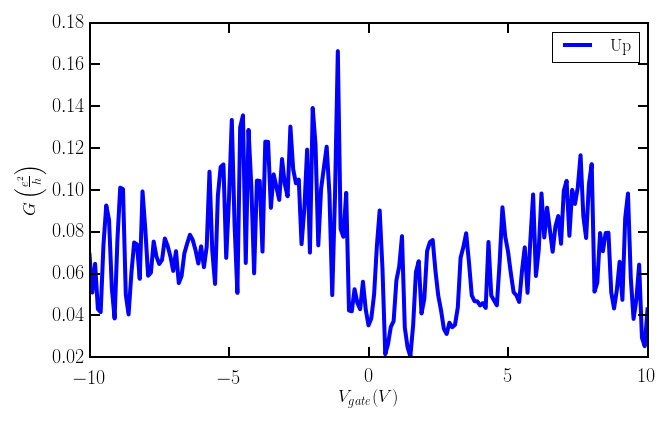

In [29]:
# filelist = ['mt7_9-11_0T_gate-sweep_n2.txt',
# 'mt7_9-11_0T_gate-sweep_n2_1.txt',
# 'mt7_9-11_0T_gate-sweep_n2_570Hz.txt',
# 'mt7_9-11_0T_gate-sweep_n2_570Hz_backward.txt']
# bias = np.array([0, 0, -1, -2, -2, -2, -2], dtype=np.float)

f = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Field']-df['Field'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Field')
# df_up = df[df['dir']>0].sort('Field')

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'], df['Cond'], label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n2_4K.pdf'))

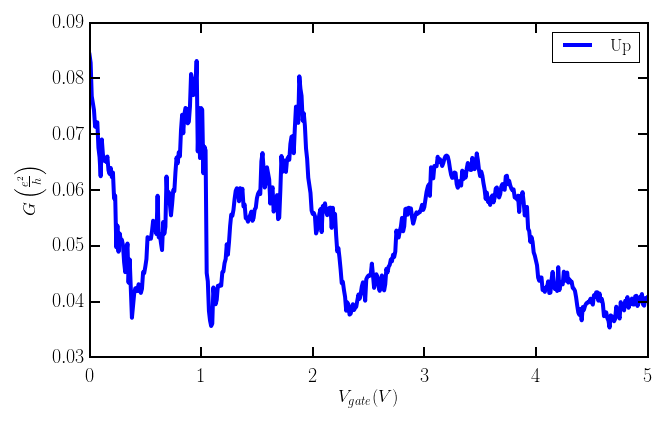

In [24]:
f = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2_1.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df.index, df['Cond'], label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n2_1_4K.pdf'))

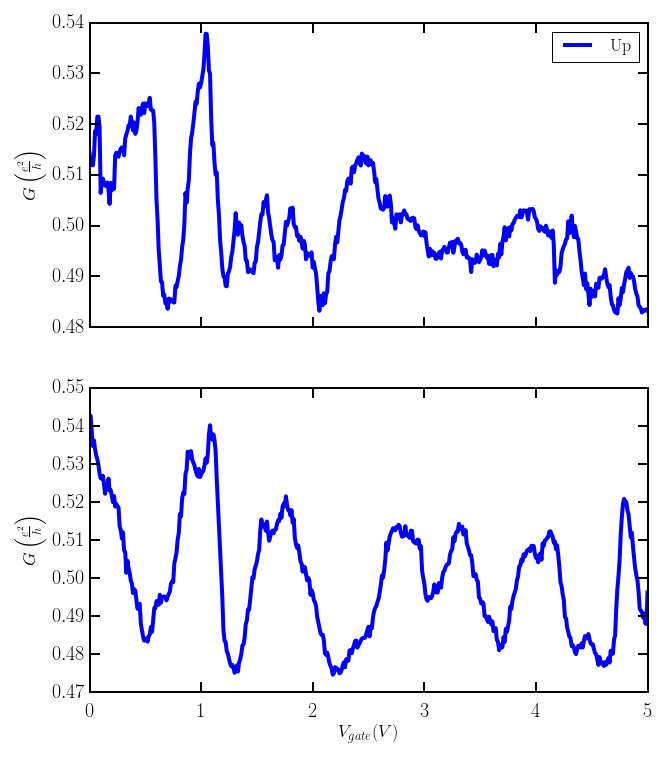

In [28]:
f = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2_570Hz.txt')
data = np.loadtxt(f, delimiter='\t')
df_up = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])

f = os.path.join(cold_dir, 'mt7_9-11_0T_gate-sweep_n2_570Hz_backward.txt')
data = np.loadtxt(f, delimiter='\t')
df_down = pd.DataFrame({'Gate' : data[:,0], 'Cond' : data[:,1]/3.875e-5}, columns = ['Gate', 'Cond'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
df_up = df_up.groupby('Gate').mean()
df_down = df_down.groupby('Gate').mean()

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 12), sharex = True)
ax1.plot(df_up.index, df_up['Cond'], label='Up')
ax2.plot(df_down.index, df_down['Cond'], label='down')
ax2.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax2.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n2_570Hz_4K.pdf'))

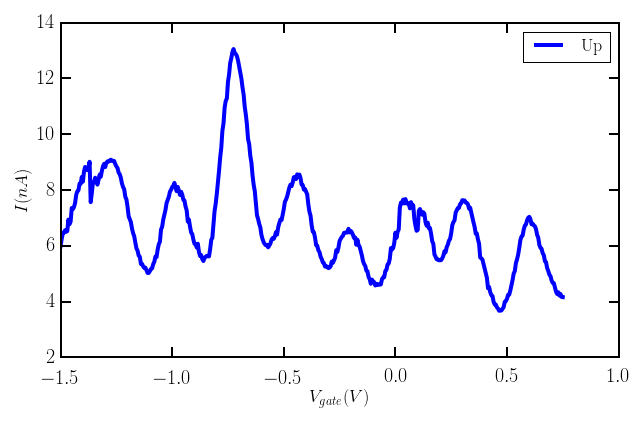

In [40]:
# filelist = [
# 'mt7_9-11_IVgate-DC_0T_n4.txt',
# 'mt7_9-11_IVgate-DC_0T_2p1.txt',
# 'mt7_9-11_IVgate-DC_0T_2p5.txt',
# 'mt7_9-11_IVgate-DC_0T_2p5_1.txt',
# 'mt7_9-11_IVgate-DC_0T_5.txt']
# bias = np.array([-4, 1.5, 2.1, 2.5, 2.5, 5], dtype=np.float)

f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_n4.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:451], df['Iavg'][0:451]*-1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n4_4K.pdf'))

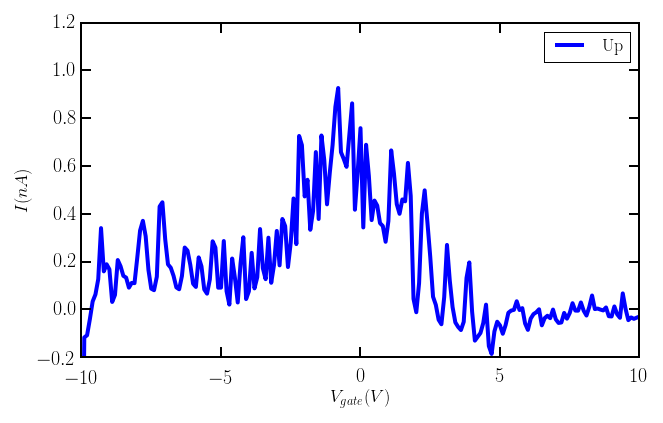

In [49]:
f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_2p1.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:201], df['Iavg'][0:201]*-1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
ax1.set_ylim(-0.2,1.2)
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_n2p1_4K.pdf'))

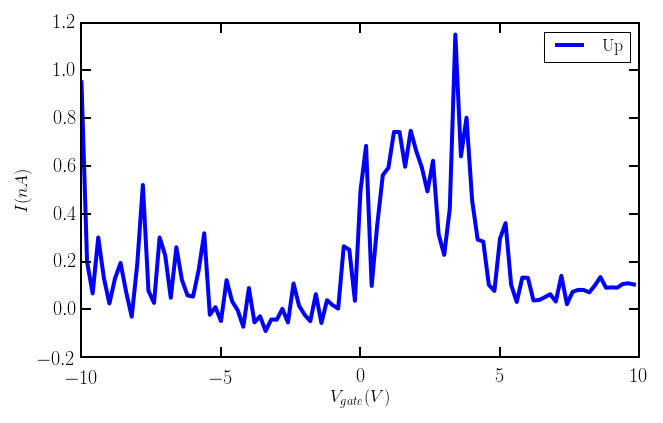

In [58]:
f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_2p5.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:100], df['Iavg'][0:100]*1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
# ax1.set_ylim(-0.2,1.2)
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_2p5_4K.pdf'))

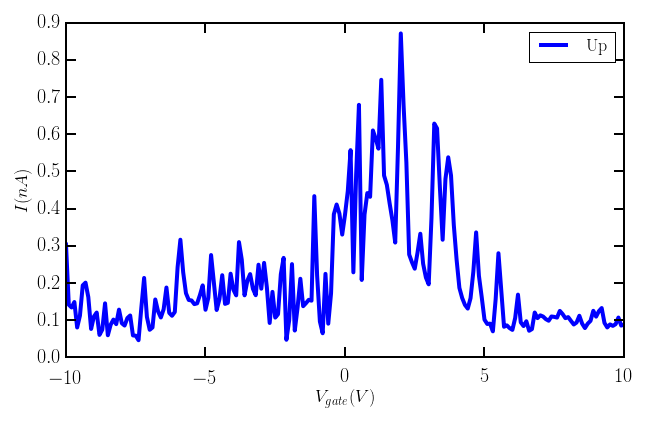

In [65]:
f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_2p5_1.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:201], df['Iavg'][0:201]*1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
# ax1.set_ylim(-0.2,1.2)
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_2p5_1_4K.pdf'))

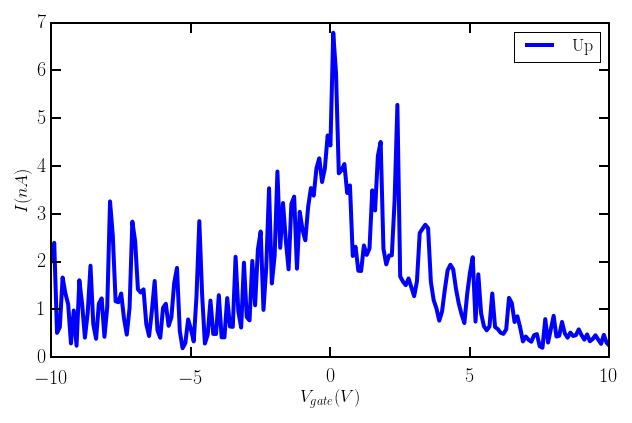

In [69]:
f = os.path.join(cold_dir, 'mt7_9-11_IVgate-DC_0T_5.txt')
data = np.loadtxt(f, delimiter='\t')
df = pd.DataFrame({'Gate' : data[:,0], 'Iavg' : data[:,1]}, columns = ['Gate', 'Iavg'])
# df = pd.rolling_mean(df,5)

# plt.plot(df['Gate'])
# df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
# df_down = df[df['dir']<0].sort('Gate')
# df_up = df[df['dir']>0].sort('Gate')
#df = df.groupby('Gate').mean()

fig, ax1 = plt.subplots(1,1, figsize = (10, 6), sharex = True)
ax1.plot(df['Gate'][0:201], df['Iavg'][0:201]*1e9, label='Up')
ax1.set_xlabel('$V_{gate} (V)$')
ax1.set_ylabel('$I (nA)$')
# ax1.set_ylim(-0.2,1.2)
ax1.legend()

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_gateswp_5_4K.pdf'))

There is a bunch of current/bias and conductance/bias data that I'm not going to plot for now. The field data is more interesting and encompases a lot of that.

In [90]:
cold_dir = '/Volumes/JUPITER/Data/MT7/GpV_MATRIX/'

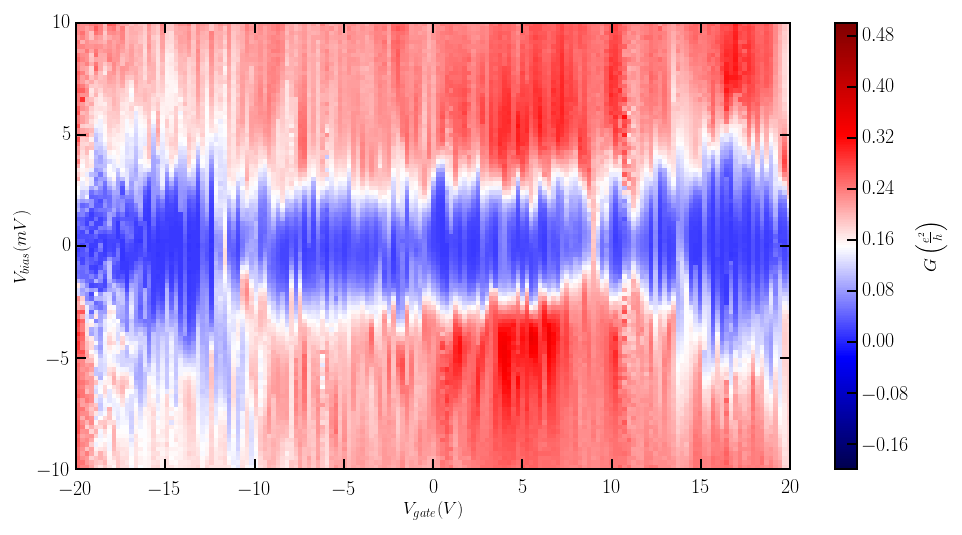

In [78]:
# filelist = [
# 'mt7_9-11_4p2K_0T_matrix_d_using-vdriveadder_Vdc_-10.0010.00_step_0.200mV.txt',
# 'mt7_9-11_4p2K_0T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt',
# 'mt7_9-11_4p2K_1T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt',
# 'mt7_9-11_4p2K_0T_matrix_g_Vdc_-2.502.50_step_0.050mV.txt'
# ]

f = os.path.join(cold_dir,'mt7_9-11_4p2K_0T_matrix_d_using-vdriveadder_Vdc_-10.0010.00_step_0.200mV.txt')
df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.5, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('$V_{gate} (V)$')
ax.set_ylabel('$V_{bias} (mV)$') 
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_d_4K.pdf'))

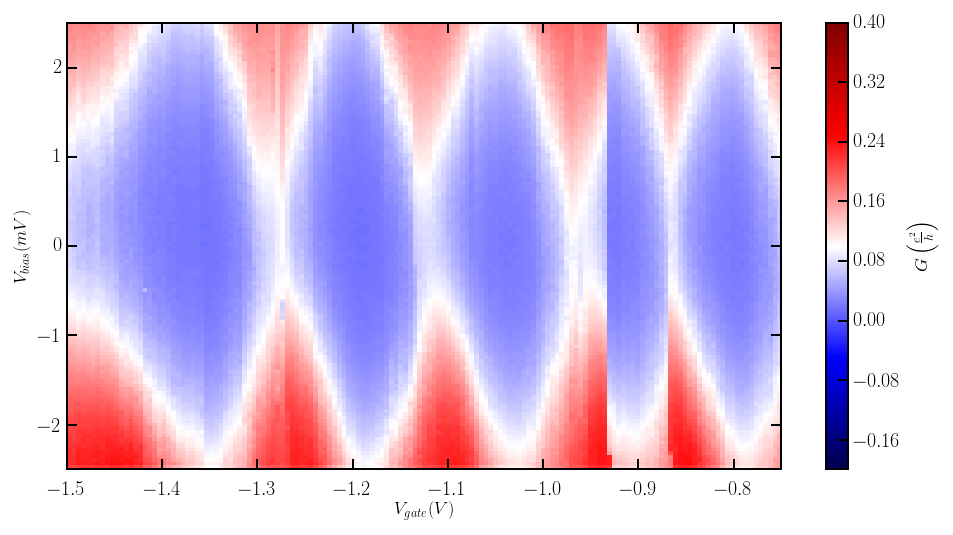

In [80]:
f = os.path.join(cold_dir,'mt7_9-11_4p2K_0T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt')
df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('$V_{gate} (V)$')
ax.set_ylabel('$V_{bias} (mV)$') 
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_h_4K.pdf'))

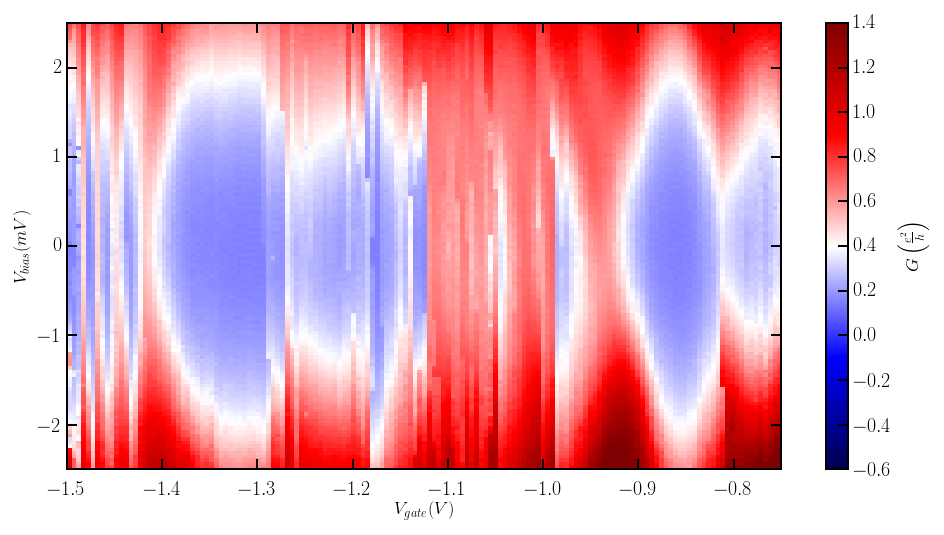

In [84]:
f = os.path.join(cold_dir,'mt7_9-11_4p2K_1T_matrix_h_Vdc_-2.502.50_step_0.040mV.txt')
df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.6, vmax = 1.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('$V_{gate} (V)$')
ax.set_ylabel('$V_{bias} (mV)$') 
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_h1T_4K.pdf'))

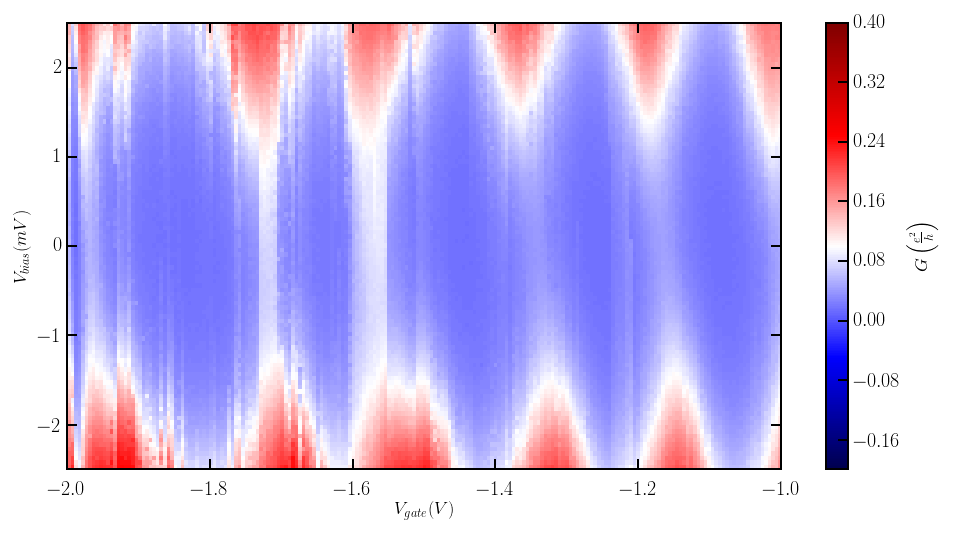

In [91]:
f = os.path.join(cold_dir,'mt7_9-11_4p2K_0T_matrix_g_Vdc_-2.502.50_step_0.050mV.txt')
df = pd.read_csv(f, sep='\t')
bias = df.iloc[1:,0].astype(np.float)
gate = df.columns[1:].astype(np.float)
cond = df.iloc[1:,1:]/3.875e-5
limits = [gate.min(), gate.max(), bias.min(), bias.max()]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cond, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel('$V_{gate} (V)$')
ax.set_ylabel('$V_{bias} (mV)$') 
cb = plt.colorbar(im)
cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_vigate_g_4K.pdf'))

In [92]:
cold_dir = '/Volumes/JUPITER/Data/MT7/GpH_MATRIX/'

In [134]:
# 'mt7_9-11_0t2T_4p2K_a_bias_-7.507.50_back-gate_-1.360V.txt'
# 'mt7_9-11_0t2T_4p2K_a-reverse_bias_-7.507.50_back-gate_-1.360V.txt'
# 'mt7_9-11_0t2T_4p2K_b-increasing_bias_-7.507.50_back-gate_-1.360V.txt'
# 'mt7_9-11_0t2T_4p2K_b-decreasing_bias_7.50-7.50_back-gate_-1.360V.txt'

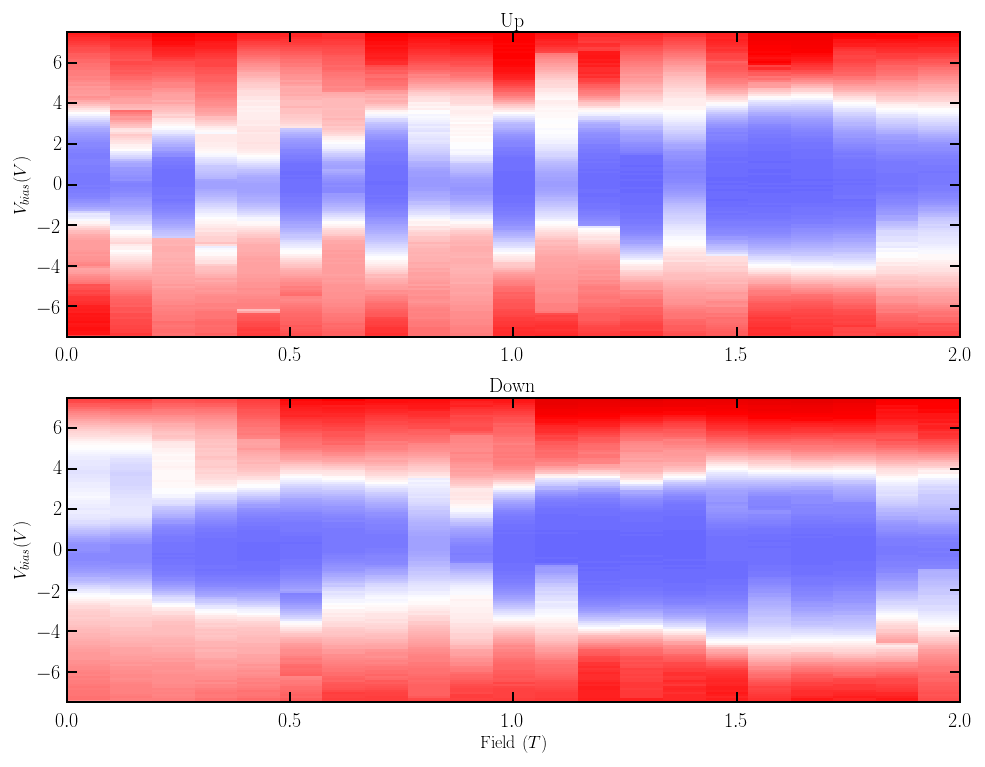

In [150]:
f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_a_bias_-7.507.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_up = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_up = df_up.sort(axis=0)
df_up = df_up.sort(axis=1)

f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_a-reverse_bias_-7.507.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_down = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_down = df_down.sort(axis=0)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(df_up)
ax1.imshow(df_up, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
limits = lvdt.df_extent(df_down)
ax2.imshow(df_down, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_bisweep_a_4K.pdf'))

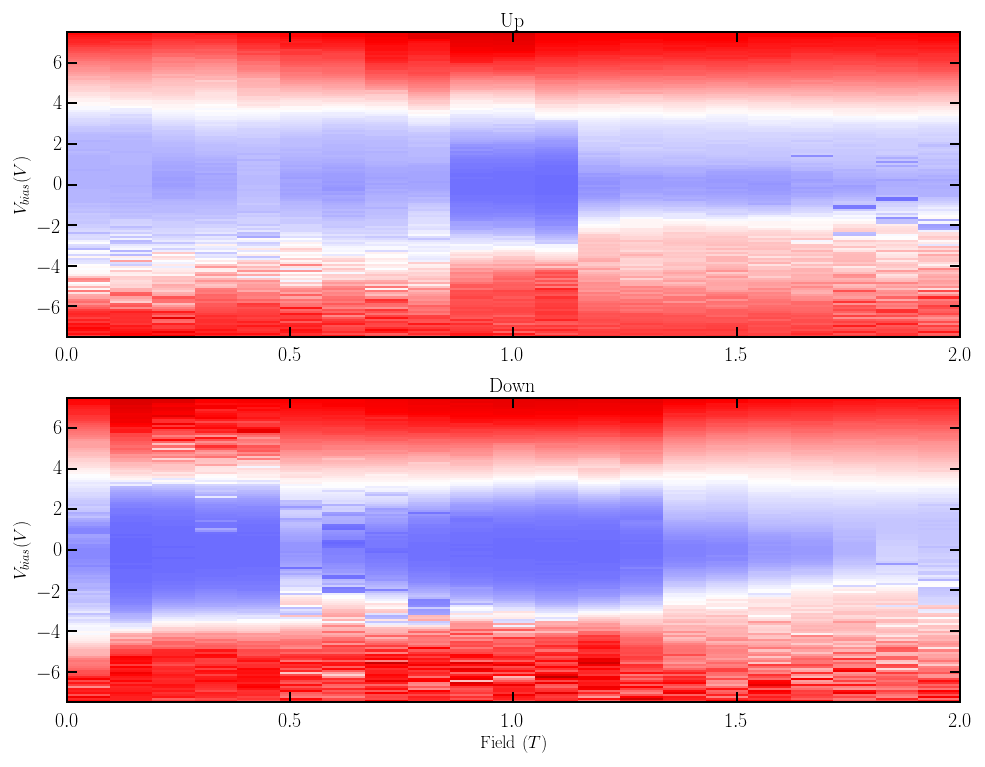

In [149]:
f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_b-increasing_bias_-7.507.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_up = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_up = df_up.sort(axis=0)
df_up = df_up.sort(axis=1)

f = os.path.join(cold_dir, 'mt7_9-11_0t2T_4p2K_b-decreasing_bias_7.50-7.50_back-gate_-1.360V.txt')
data = np.genfromtxt(f, delimiter='\t')
bias = data[2:,0]
field = data[0,1:]
df_down = pd.DataFrame(data[2:,1:]/3.875e-5, index = bias, columns = field)
df_down = df_down.sort(axis=0)

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(df_up)
ax1.imshow(df_up, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
limits = lvdt.df_extent(df_down)
ax2.imshow(df_down, extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.2, vmax=0.4, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'mt7_9-11_bisweep_b_4K.pdf'))

In [164]:
# plot niobium test from other MT device. MT5 I think it was?

#scfmh8

In [154]:
def get_indices(data):
    """ takes a set of data and returns all of """
    start = 0 #index to start reading
    inds = [start]
    while start<len(data): 
        length = data[start] # first element in the set is the length
        end = start+length # last index in data set
        inds.append(end)
        start = end
    return inds

def get_padded_df(data, slow):
    """ pad different length data sets with np.inf (to be consistent
        with my LabView script) to create a rectangular numpy array 
        with each data set in it's own row 
        
        data: 1D array read from the binary file
        slow: slow scan axis name like 'bias', 'gate', ... """
    
    inds = get_indices(data)
    lengths = np.diff(inds)
    max_length = max(lengths)
    
    val = np.inf
    out = np.zeros((len(lengths),max(lengths)))
    for i in range(len(lengths)):
        out[i] = np.append(data[inds[i]:inds[i+1]], np.zeros(max_length-lengths[i])+val)
    col_names = ['size', slow]
    col_names.extend([str(n) for n in range(int(max_length-2))])
    return pd.DataFrame(out[:,1:], columns = col_names[1:])

In [155]:
root = '/Volumes/EDDropbox/Data/'
data_dir ='/Volumes/JUPITER/Data/scfmh8/'
figure_dir = '/Users/nik/Dropbox/Repos/thesis/figures/scfmdots/'

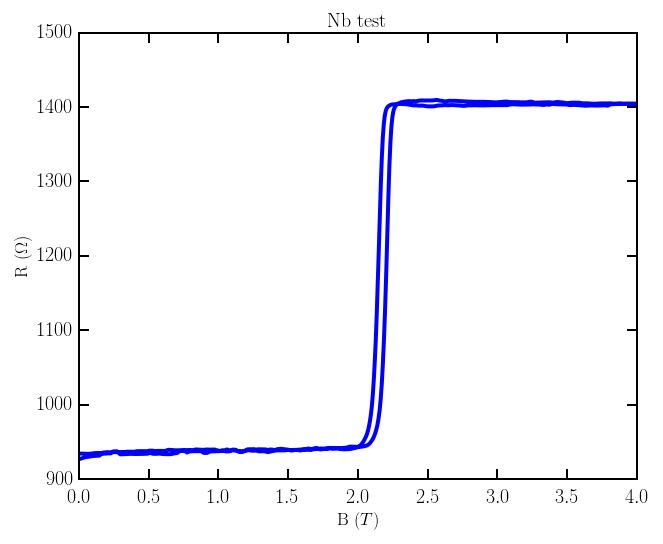

In [195]:
# this is a check of the critical field of Niobium

f = data_dir+'fieldswp_4-2-6_4K_c.bin'
data = np.fromfile(f, '>d') # big-endian double point floats

bibias = get_padded_df(data, 'bias')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

i=2
bias = bibias['bias'][i]
field = pd.rolling_mean(bibias.loc[i][1:], 3)
current = pd.rolling_mean(bibias.loc[i+1][1:], 3)
ax.plot(field, bias/current, label = r'${0:+.1f} mV$'.format(bias*1000))
ax.set_xlim(0,4)
ax.set_title('Nb test')
ax.set_ylabel('R $(\Omega)$')
ax.set_xlabel('B $(T)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_niobium_check.pdf'))

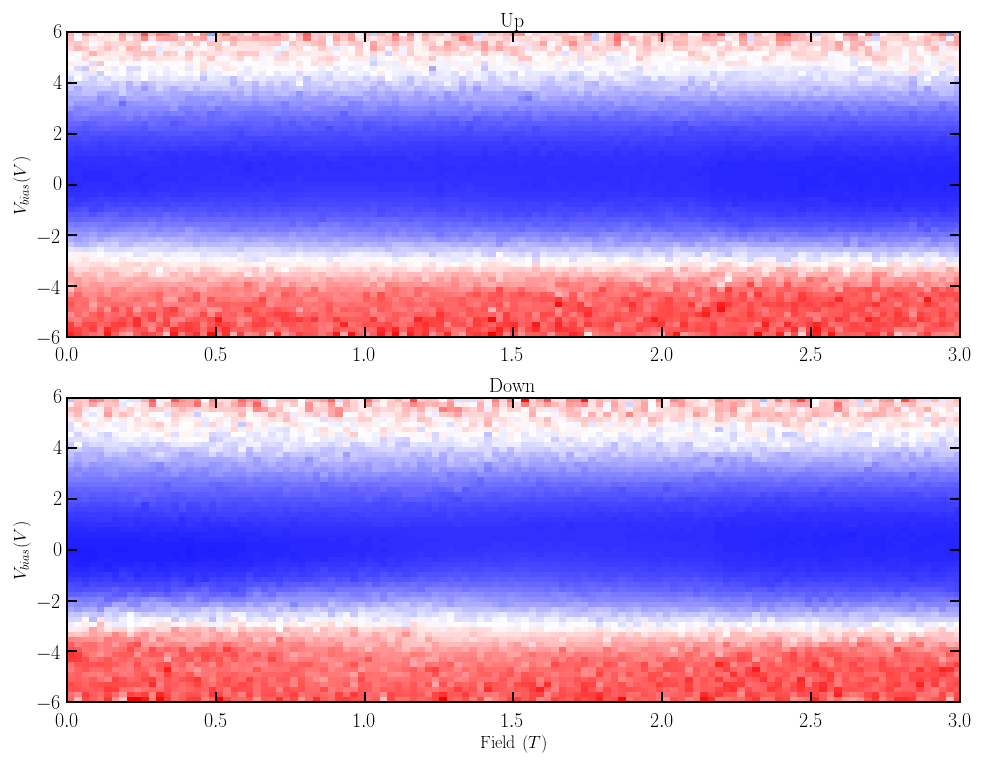

In [198]:
# fix field - sweep bias two superconducting leads

f = data_dir+'vifield_2-1-6_4K_a.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
vifield.index = vifield.index*1000
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(dvdi)
ax1.imshow(dvdi.iloc[:,0:121], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.imshow(dvdi.iloc[:,:121:-1], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_2-1_bisweep_a_4K.pdf'))

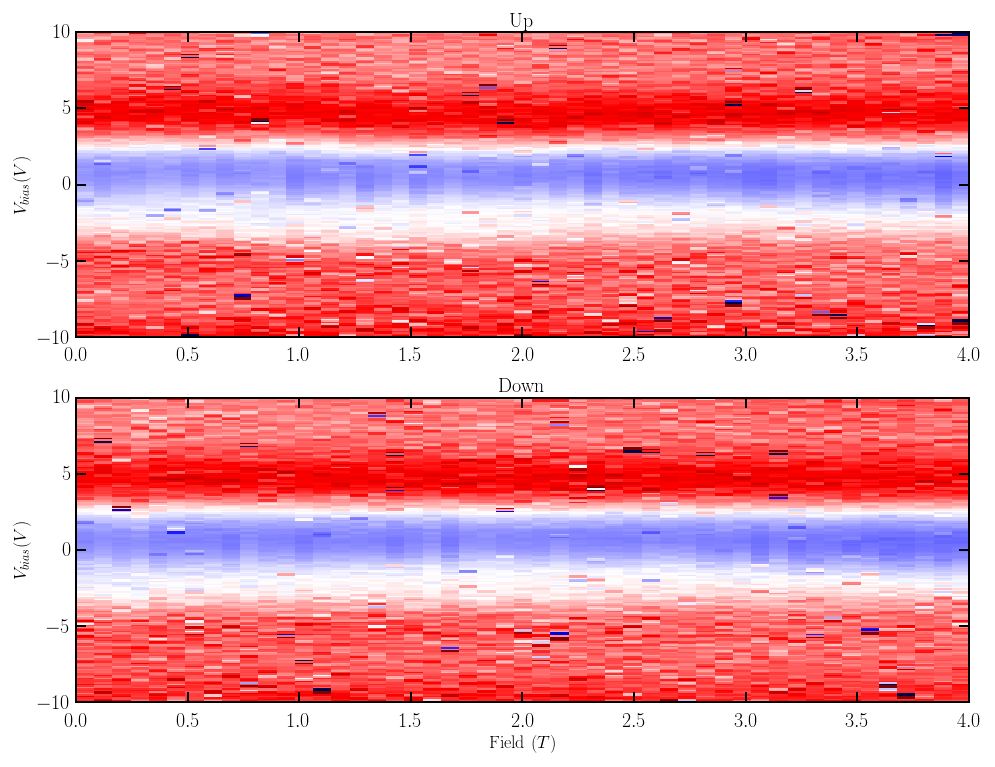

In [170]:
# fix field - sweep bias Py/Nb leads

f = data_dir+'vifield_15-16-6_4K_c.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
vifield.index = vifield.index*1000
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(dvdi)
ax1.imshow(dvdi.iloc[:,0:51], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.imshow(dvdi.iloc[:,:52:-1], extent = limits, 
               cmap = plt.cm.seismic, vmin = -0.1, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_bisweep_c_4K.pdf'))

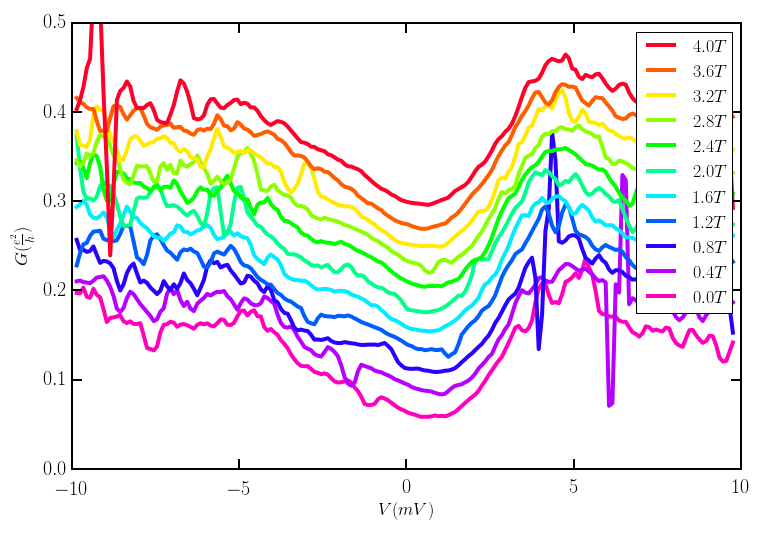

In [173]:
# Here are some cuts across the same data

f = data_dir+'vifield_15-16-6_4K_c.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5

#look at up sweep data only
df = dvdi.iloc[0:200,0:51]

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

values = np.linspace(1, 0, len(df.columns)/5+1)
cm = plt.get_cmap('gist_rainbow')
ax.set_color_cycle([cm(v) for v in values])

for i in range(0, len(df.columns), 5):
    field = df.columns.values[i]
    bias = pd.rolling_mean(df.index.values, 4)
    cond = pd.rolling_mean(df.iloc[:,i], 4)
    ax.plot(bias*1e3, cond+0.005*i, label = r'${0}T$'.format(field))
ax.set_xlim(-10,10)
ax.set_ylim(0,0.5)
#ax.set_title('fix bias -- sweep field', fontsize=16)
ax.set_ylabel(r'$G (\frac{e^2}{h})$')
ax.set_xlabel(r'$V (mV)$')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_bisweep_c-cuts_4K.pdf'))

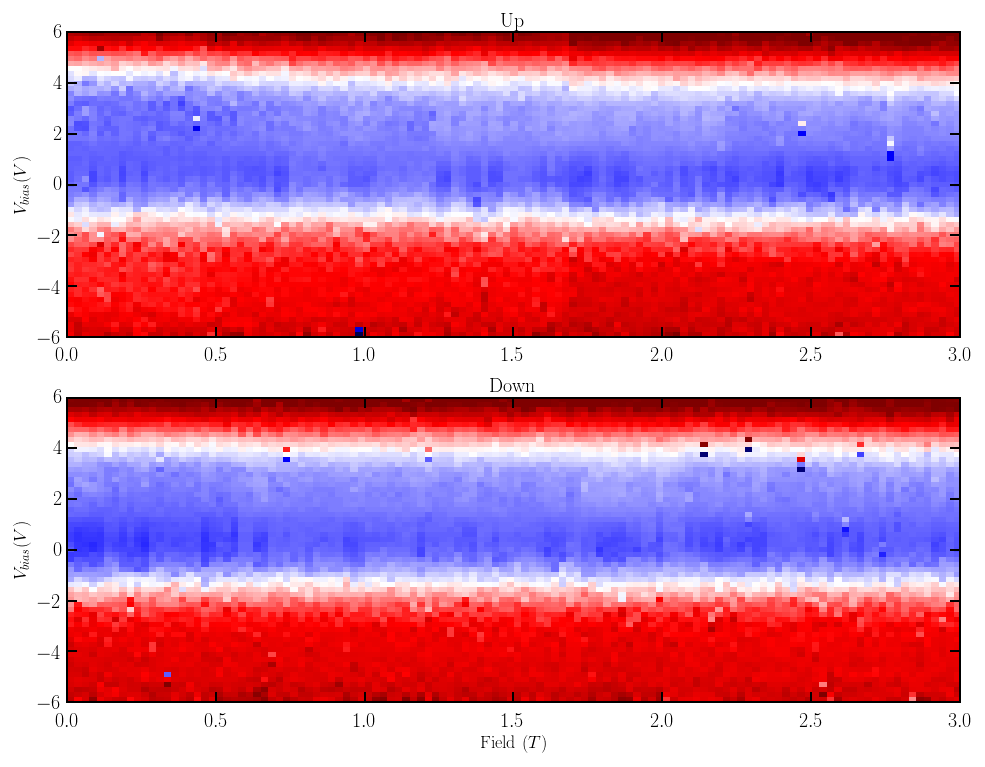

In [192]:
# fix field - sweep bias Py/Nb leads

f = data_dir+'vifield_15-16-6_4K_d.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
vifield.index = vifield.index*1000
dvdi = get_dIdV(vifield,75e-6)/3.8755e-5

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,12))
limits = lvdt.df_extent(dvdi)
ax1.imshow(dvdi.iloc[:,0:121], extent = limits, 
               cmap = plt.cm.seismic, vmin = 0.05, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax2.imshow(dvdi.iloc[:,:121:-1], extent = limits, 
               cmap = plt.cm.seismic, vmin = 0.05, vmax=0.3, 
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax1.set_title('Up')
ax2.set_title('Down')
ax2.set_xlabel('Field $(T)$')
ax1.set_ylabel('$V_{bias} (V)$')
ax2.set_ylabel('$V_{bias} (V)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_bisweep_d_4K.pdf'))

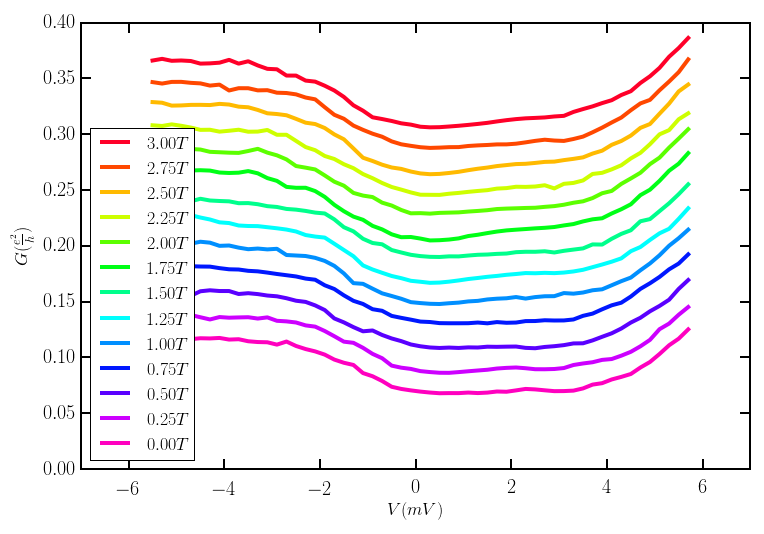

In [194]:
# Here are some cuts across the same data

f = data_dir+'vifield_15-16-6_4K_d.bin'

vifield = lvdt.get_data_3d(f)
vifield = vifield.groupby(vifield.index).mean()
dvdi = (vifield.diff()/75e-6)/7.75e-5

#get just the subset I want...
df = dvdi.iloc[:,0:121] # up sweep

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

values = np.linspace(1, 0, len(df.columns)/10+1)
cm = plt.get_cmap('gist_rainbow')
ax.set_color_cycle([cm(v) for v in values])

for i in range(0, len(df.columns), 10):
    field = df.columns.values[i]
    bias = pd.rolling_mean(df.index.values, 4)
    cond = pd.rolling_mean(df.iloc[:,i], 4)
    ax.plot(bias*1e3, cond+0.002*i , label = r'${0:.2f}T$'.format(field))
ax.set_xlim(-7,7)
ax.set_ylim(0,0.4)
#ax.set_title('fix bias -- sweep field', fontsize=16)
ax.set_ylabel(r'$G (\frac{e^2}{h})$')
ax.set_xlabel(r'$V (mV)$')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], fontsize = 18, loc='lower left')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_bisweep_d-cuts_4K.pdf'))

In [199]:
def get_sweep_direction(a):
    if np.diff(a).mean() > 0:
        return 1
    else:
        return -1

def get_single_sweep(field, current):
    inds = np.where(field == np.inf)[0][0:2]
    one = np.dstack((field[0:inds[0]], current[0:inds[0]]))[0]
    two = np.dstack((field[inds[0]+1:inds[1]], current[inds[0]+1:inds[1]]))[0]
    if get_sweep_direction(one) > 0:
        return one, two # up sweep first
    else:
        return two, one # up sweep first

In [200]:
# leads 15(+)(Py)->16(-)(Nb)
p = data_dir+'fieldswp_15-16-6_4K_d.bin' # fix bias sweep field from 0->3T 
n = data_dir+'fieldswp_15-16-6_4K_h.bin' # fix bias sweep field from 0->-3T

# leads 2(+)(Nb)->1(-)(Nb)
s = data_dir+'fieldswp_2-1-6_4K_a.bin'# fix bias sweep fielf from 0->3T

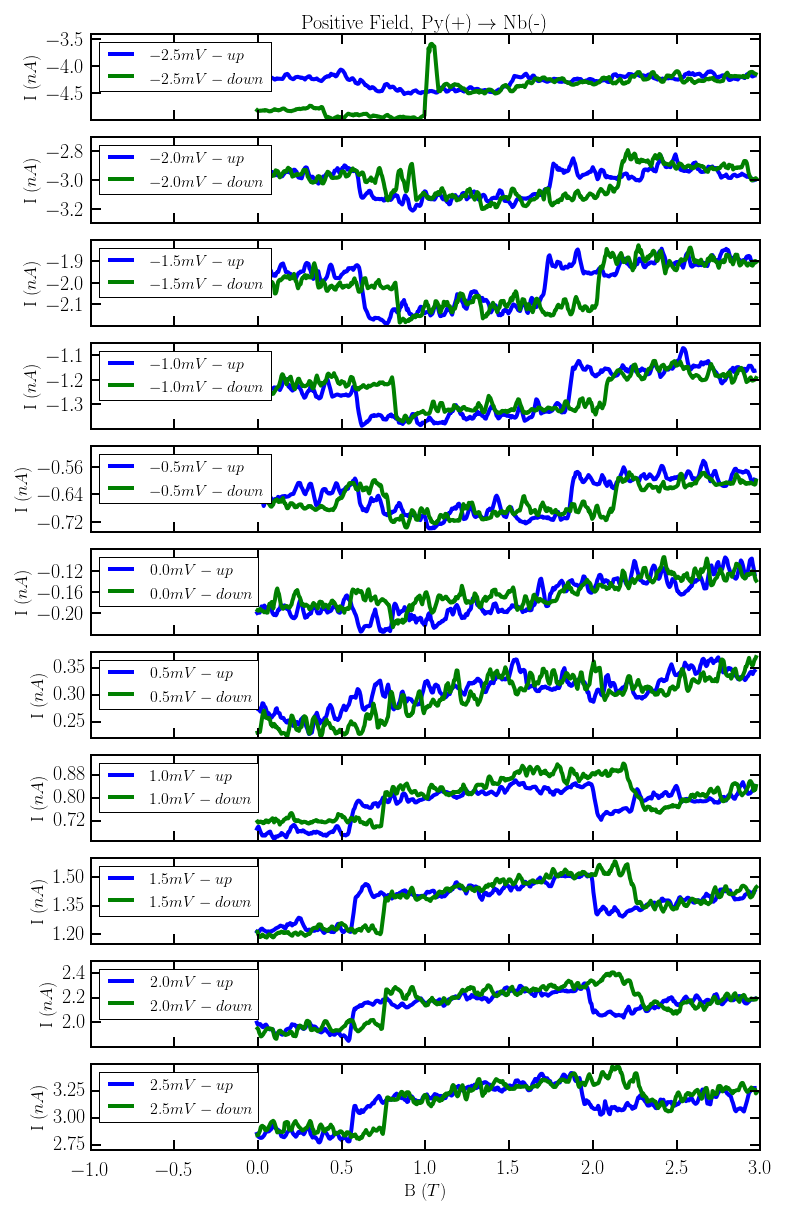

In [205]:
# positive field Py/Nb leads
data = np.fromfile(p, '>d') # big-endian double point floats
df = get_padded_df(data, 'bias')

from matplotlib.ticker import MaxNLocator

fig, axs = plt.subplots(len(df)/2,1,sharex = True, sharey=False, 
                        figsize=(12,20))
axs = axs.flat
#fig.subplots_adjust(hspace=.5)

axs[0].set_title(r'Positive Field, Py(+) $\rightarrow$ Nb(-)')
for i in range(len(df)/2):
    bias = df['bias'][2*i]
    field = df.iloc[2*i,1:]
    current = df.iloc[2*i+1,1:]
    up,down = get_single_sweep(field, current)
    up = pd.rolling_mean(up, 5)
    down = pd.rolling_mean(down, 5)
    axs[i].plot(up[:,0], up[:,1]*1e9, c = 'b',
                label = r'${0:.1f}mV - up$'.format(bias*1e3))
    axs[i].plot(down[:,0], down[:,1]*1e9, c = 'g',
                label = r'${0:.1f}mV - down$'.format(bias*1e3))
    axs[i].yaxis.set_major_locator(MaxNLocator (nbins = 4, prune = 'both'))
    axs[i].set_ylabel('I $(nA)$')
    axs[i].legend(loc = 'upper left', fontsize = 16)
    
axs[-1].set_xlim(-1,3)
#ax.set_title('sweep direction test')
axs[-1].set_xlabel('B $(T)$')
#ax.set_ylabel('I $(nA)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_fieldswp_p_4K.pdf'))

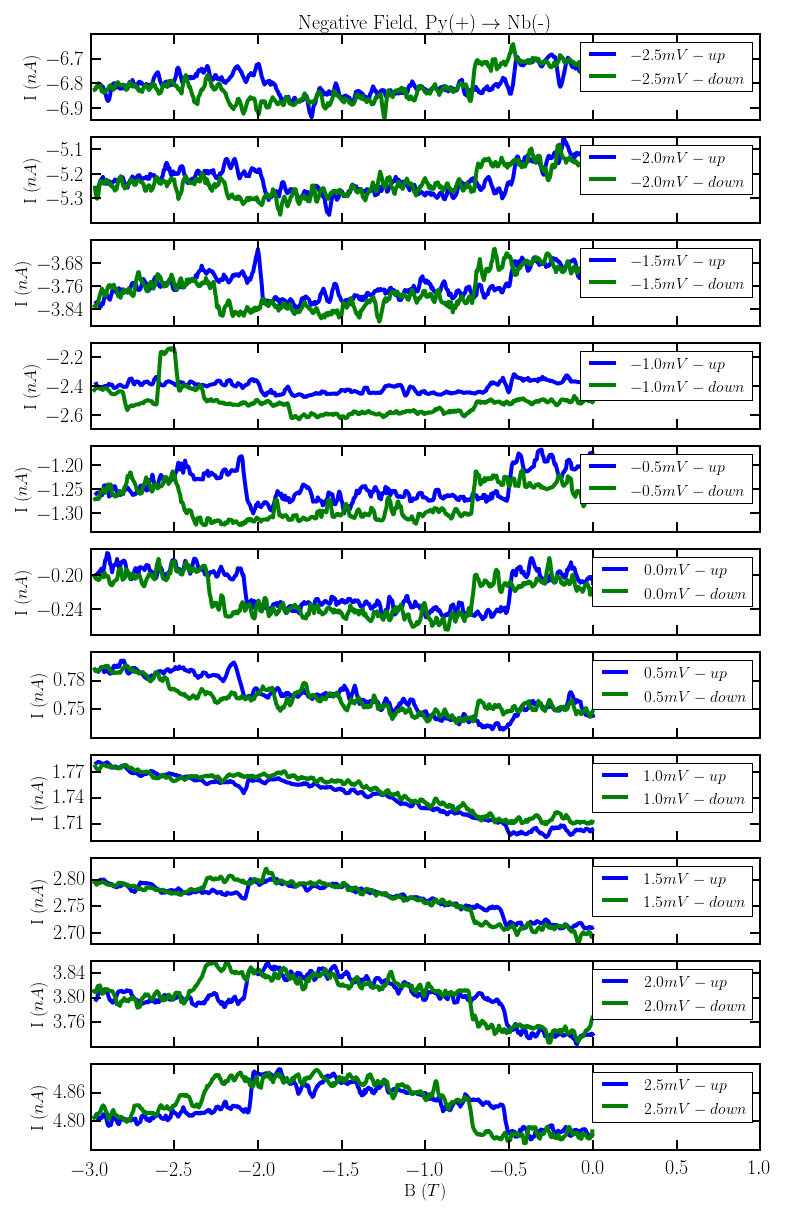

In [209]:
# negative field Py/Nb leads
data = np.fromfile(n, '>d') # big-endian double point floats
df = get_padded_df(data, 'bias')


fig, axs = plt.subplots(len(df)/2,1,sharex = True, sharey=False, 
                        figsize=(12,20))
axs = axs.flat

axs[0].set_title(r'Negative Field, Py(+) $\rightarrow$ Nb(-)')
for i in range(len(df)/2):
    bias = df['bias'][2*i]
    field = df.iloc[2*i,1:]
    current = df.iloc[2*i+1,1:]
    up,down = get_single_sweep(field, current)
    up = pd.rolling_mean(up, 5)
    down = pd.rolling_mean(down, 5)
    axs[i].plot(-1.0*up[:,0], up[:,1]*1e9, c = 'b',
                label = r'${0:.1f}mV - up$'.format(bias*1e3))
    axs[i].plot(-1.0*down[:,0], down[:,1]*1e9, c = 'g',
                label = r'${0:.1f}mV - down$'.format(bias*1e3))
    axs[i].yaxis.set_major_locator(MaxNLocator (nbins = 4, prune = 'both'))
    axs[i].set_ylabel('I $(nA)$')
    axs[i].legend(loc = 'upper right', fontsize = 16)
    
axs[-1].set_xlim(-3,1)
#ax.set_title('sweep direction test')
axs[-1].set_xlabel('B $(T)$')
#ax.set_ylabel('I $(nA)$')

fig.savefig(os.path.join(fig_dir, 'scfmh8_15-16_fieldswp_n_4K.pdf'))

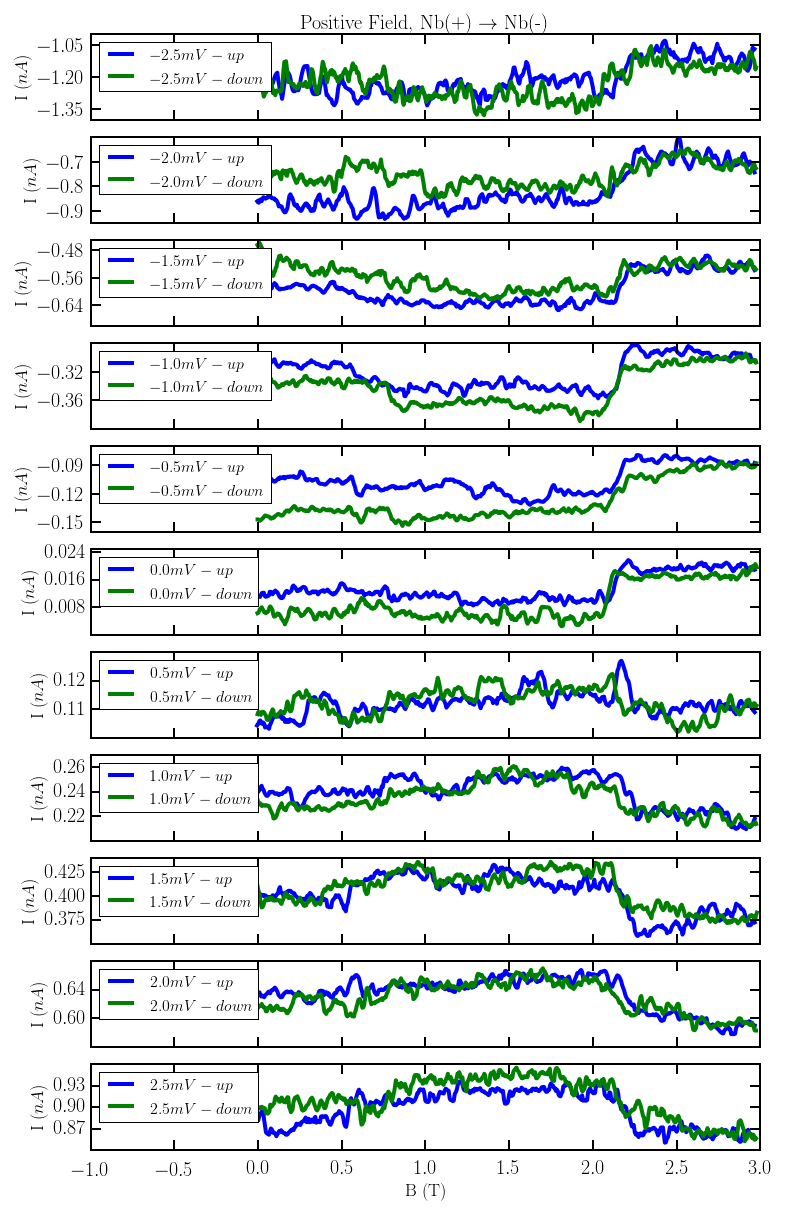

In [208]:
# positive field Nb/Nb leads
data = np.fromfile(s, '>d') # big-endian double point floats
df = get_padded_df(data, 'bias')


fig, axs = plt.subplots(len(df)/2,1,sharex = True, sharey=False, 
                        figsize=(12,20))
axs = axs.flat

axs[0].set_title(r'Positive Field, Nb(+) $\rightarrow$ Nb(-)')
for i in range(len(df)/2):
    bias = df['bias'][2*i]
    field = df.iloc[2*i,1:]
    current = df.iloc[2*i+1,1:]
    up,down = get_single_sweep(field, current)
    up = pd.rolling_mean(up, 5)
    down = pd.rolling_mean(down, 5)
    axs[i].plot(up[:,0], up[:,1]*1e9, c = 'b',
                label = r'${0:.1f}mV - up$'.format(bias*1e3))
    axs[i].plot(down[:,0], down[:,1]*1e9, c = 'g',
                label = r'${0:.1f}mV - down$'.format(bias*1e3))
    axs[i].yaxis.set_major_locator(MaxNLocator (nbins = 4, prune = 'both'))
    axs[i].set_ylabel('I $(nA)$')
    axs[i].legend(loc = 'upper left', fontsize = 16)
    
axs[-1].set_xlim(-1,3)
#ax.set_title('sweep direction test')
axs[-1].set_xlabel('B (T)')
#ax.set_ylabel('I (nA)')

fig.savefig(os.path.join(fig_dir, 'scfmh8_2-1_fieldswp_s_4K.pdf'))